## Companies valuation (valuation computation, balance sheet driven)(math)

In [4]:
import requests 
import pandas as pd

import requests

demo= '31853220bc5708a36155ca7f0481a5e0'

companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=100&apikey={demo}')
companies = companies.json()
technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])

print(technological_companies)

['AAPL', 'MSF.BR', 'MSFT', 'TSM', 'NVDA', 'INTC', 'INCO.BR', 'ASML', 'ADBE', 'CRM', 'CSCO', 'CIS.BR', 'SHOP.TO', 'ASML.AS', 'AVGO', 'QCOM', 'ORCL', 'ACN', 'TXN', 'SAP', 'SHOP', 'SNE', 'IBMA.BR', 'IBM', 'AMD', 'SQ', 'UBER', 'NOW', 'INTU']


In [5]:
pricetosales = {}
for item in technological_companies:
    try:
      #annual income statement since we need anual sales
      IS = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{item}?apikey={demo}')
      IS = IS.json()
      print(IS)
      Revenue = IS[0]['revenue']
      grossprofitratip = IS[0]['grossProfitRatio']
      #most recent market capitliazation
      MarketCapit = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{item}?apikey={demo}')
      MarketCapit = MarketCapit.json()
      MarketCapit = MarketCapit[0]['marketCap']

      #Price to sales
      p_to_sales = MarketCapit/Revenue

      pricetosales[item] = {}
      pricetosales[item]['revenue'] = Revenue
      pricetosales[item]['Gross_Profit_ratio'] = grossprofitratip
      pricetosales[item]['price_to_sales'] = p_to_sales
      pricetosales[item]['Market_Capit'] = MarketCapit
    except:
      pass
print(pricetosales)

[{'date': '2020-09-26', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'fillingDate': '2020-10-30', 'acceptedDate': '2020-10-29 18:06:25', 'period': 'FY', 'revenue': 274515000000, 'costOfRevenue': 169559000000, 'grossProfit': 104956000000, 'grossProfitRatio': 0.382332477278109, 'researchAndDevelopmentExpenses': 18752000000, 'generalAndAdministrativeExpenses': 19916000000, 'sellingAndMarketingExpenses': 0.0, 'otherExpenses': -87000000, 'operatingExpenses': 38668000000, 'costAndExpenses': 208227000000, 'interestExpense': 2873000000, 'depreciationAndAmortization': 11056000000, 'ebitda': 81020000000, 'ebitdaratio': 0.295138699160337, 'operatingIncome': 66288000000, 'operatingIncomeRatio': 0.244398302460703, 'totalOtherIncomeExpensesNet': -87000000, 'incomeBeforeTax': 67091000000, 'incomeBeforeTaxRatio': 0.244398302460703, 'incomeTaxExpense': 9680000000, 'netIncome': 57411000000, 'netIncomeRatio': 0.209136112780722, 'eps': 3.36, 'epsdiluted': 3.36, 'weightedAverageShsOut': 17057622000, 'weigh

In [6]:
pricetosales["SNE"]["revenue"]=pricetosales["SNE"]["revenue"]/100

In [7]:
pricetosales["SNE"]

{'revenue': 86656870000.0,
 'Gross_Profit_ratio': 0.2772418389909536,
 'price_to_sales': 0.014981380652263463,
 'Market_Capit': 129823955560.371}

In [8]:
pricetosales["TSM"]["revenue"]=pricetosales["TSM"]["revenue"]/28

In [9]:
pricetosales["TSM"]

{'revenue': 38213885714.28571,
 'Gross_Profit_ratio': 0.46047388533412686,
 'price_to_sales': 0.5778900274827438,
 'Market_Capit': 618335857038.228}

In [11]:
#IS

In [12]:
price_to_sales_df = pd.DataFrame.from_dict(pricetosales, orient='index')


In [13]:
price_to_sales_df['ps_average_sector'] = price_to_sales_df['price_to_sales'].mean()
price_to_sales_df['pscompany_vs_averagesector'] = price_to_sales_df['price_to_sales'] - price_to_sales_df['ps_average_sector']
price_to_sales_df['price_as_per_average_industryPS'] = price_to_sales_df['ps_average_sector'] * price_to_sales_df['revenue']
price_to_sales_df['price_difference'] = price_to_sales_df['price_as_per_average_industryPS'] - price_to_sales_df['Market_Capit']

In [14]:
price_to_sales_df

,revenue,Gross_Profit_ratio,price_to_sales,Market_Capit,ps_average_sector,pscompany_vs_averagesector,price_as_per_average_industryPS,price_difference
AAPL,2.745150e+11,0.382332,8.227988,2.258706e+12,14.541941,-6.313954,3.991981e+12,1.733275e+12
MSFT,1.430150e+11,0.677810,11.552554,1.652189e+12,14.541941,-2.989387,2.079716e+12,4.275272e+11
TSM,3.821389e+10,0.460474,0.577890,6.183359e+11,14.541941,-13.964051,5.557041e+11,-6.263178e+10
NVDA,1.091800e+10,0.619894,31.034533,3.388350e+11,14.541941,16.492592,1.587689e+11,-1.800661e+11
INTC,7.196500e+10,0.585562,3.378303,2.431196e+11,14.541941,-11.163638,1.046511e+12,8.033912e+11
ADBE,1.117130e+10,0.850266,20.493972,2.289442e+11,14.541941,5.952031,1.624523e+11,-6.649190e+10
CRM,1.709800e+10,0.752310,11.982162,2.048710e+11,14.541941,-2.559779,2.486381e+11,4.376710e+10
CSCO,4.930100e+10,0.642644,3.902905,1.924171e+11,14.541941,-10.639036,7.169322e+11,5.245151e+11
ASML.AS,1.182000e+10,0.446684,14.982322,1.770910e+11,14.541941,0.440381,1.718857e+11,-5.205301e+09
AVGO,2.388800e+10,0.565807,7.970974,1.904106e+11,14.541941,-6.570968,3.473779e+11,1.569673e+11


ConversionError: Failed to convert value(s) to axis units: ['a']

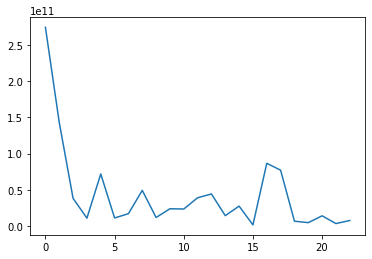

In [23]:
price_to_sales_df.revenue.plot(rot=45, xticks=["a"])

In [21]:
price_to_sales_df.index.tolist()

['AAPL',
 'MSFT',
 'TSM',
 'NVDA',
 'INTC',
 'ADBE',
 'CRM',
 'CSCO',
 'ASML.AS',
 'AVGO',
 'QCOM',
 'ORCL',
 'ACN',
 'TXN',
 'SAP',
 'SHOP',
 'SNE',
 'IBM',
 'AMD',
 'SQ',
 'UBER',
 'NOW',
 'INTU']

### Company Valuation base on the balance sheet